# Basic workshop ML

## Import libraries

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

## Load dataset

In [80]:
df = sns.load_dataset('iris')
df.head() ## dump 5 rows

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## To check if there is missing data

In [81]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Data Exploration

c:\Users\LENOVO LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

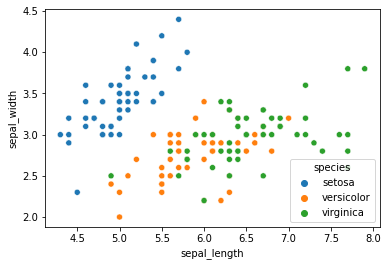

In [83]:
sns.scatterplot("sepal_length", "sepal_width", data=df, hue="species") # scatter plot แยกสี

c:\Users\LENOVO LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

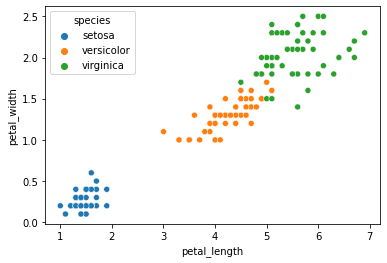

In [84]:
sns.scatterplot("petal_length", "petal_width", data=df, hue="species")

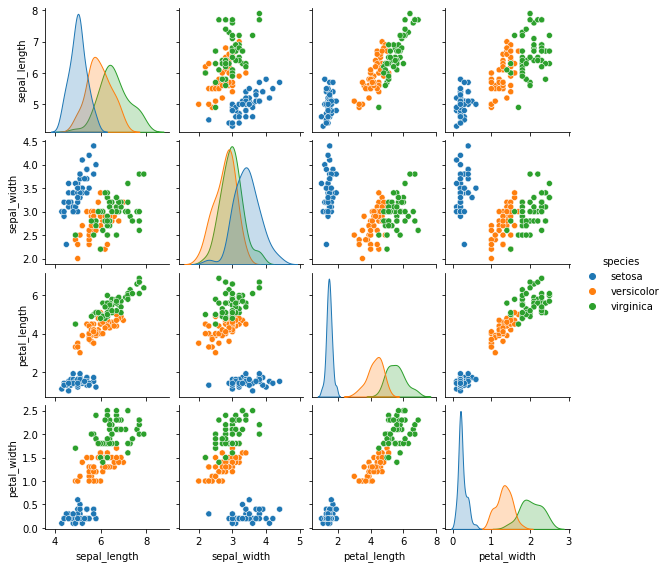

In [85]:
sns.pairplot(df, hue="species", height=2.0)

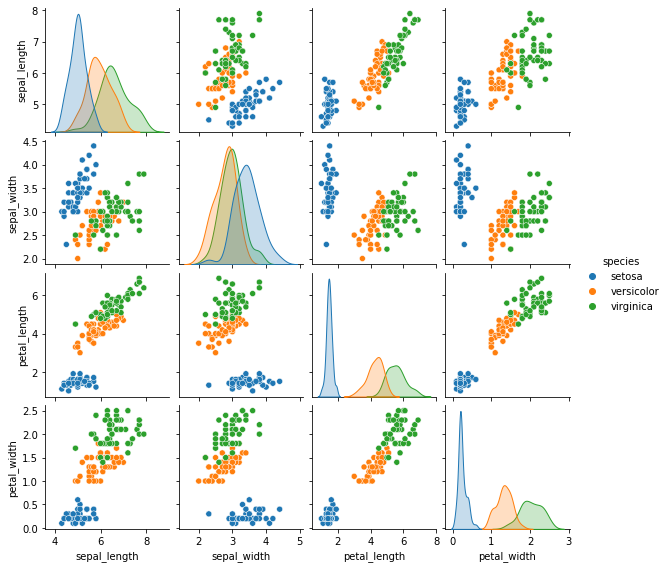

In [86]:
sns.pairplot(df[:-1], hue="species", height=2.0)

## Feature selection

In [87]:
X = df.drop("species", axis= 1)

In [88]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [89]:
y = df.species

In [90]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [91]:
X.shape

(150, 4)

In [92]:
y.shape

(150,)

## Turn dataset into tranning set & test set

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## To check how many Species in Test set

In [95]:
import numpy as np

In [96]:
(label, count) = np.unique(y_test, return_counts=True)
freq = np.asarray((label, count)).T
print(freq)

[['setosa' 17]
 ['versicolor' 15]
 ['virginica' 13]]


In [97]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [98]:
from sklearn.svm import SVC

In [99]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [100]:
y_pred = model.predict(X_test)

In [101]:
print('Accuracy score {:.4f}'.format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy score 0.9778
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       1.00      0.93      0.97        15
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[17  0  0]
 [ 0 14  1]
 [ 0  0 13]]
